<a href="https://colab.research.google.com/github/MuhammadKhairunnasNurdin/PCVK_Ganjil_2024/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practicum**

## **Mount Drive**

In [74]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Linear Brightness Transformation**

Change image Brightness ratio
-----------------------------
Input Brightness value: 50


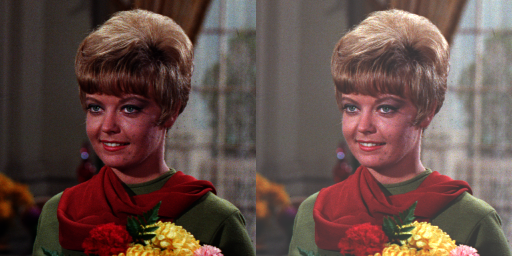

In [75]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Change image Brightness ratio')
print('-----------------------------')
try:
  brightness = int(input('Input Brightness value: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK-Asset/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# access image each-pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y,x,c] + brightness, 0, 255)

# solution without looping
# brightness = cv.convertScaleAbs(original, beta=brightness)

# show image
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## **Practicum Task**

### **1.Implement image inverse on Google Colaboratory using the formula found in the Theory Review section**

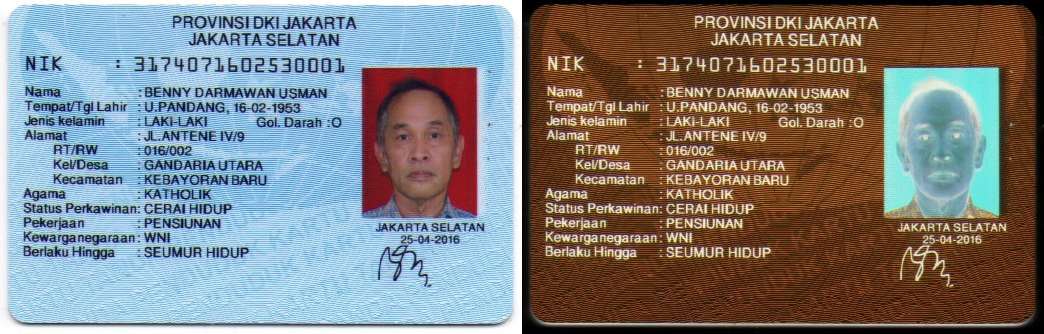

In [87]:
original_ktp = cv.imread('/content/drive/MyDrive/PCVK-Asset/ktp-test.jpg')
original_ktp = cv.resize(original_ktp, (0,0), fx=0.5, fy=0.5)
inverse_ktp = original_ktp.copy()

for y in range(inverse_ktp.shape[0]):
  for x in range(inverse_ktp.shape[1]):
    for c in range(inverse_ktp.shape[2]):
      inverse_ktp[y,x,c] = 255 - inverse_ktp[y,x,c]

cv2_imshow(cv.hconcat((original_ktp, inverse_ktp)))

### **2.Implement contrast transformation in Google Colaboratory using formula contained in the Theory Review section for contrast**

Change image Brightness ratio and contras
-----------------------------
Input Brightness value [-255 - 255]: 50
Input Contrast value [1.0 - 3.0]: 2


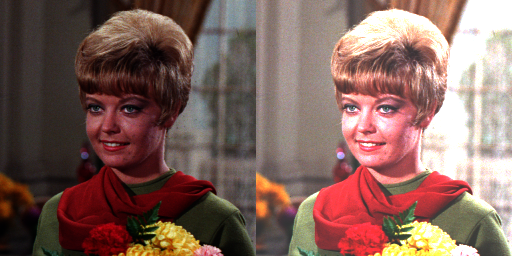

In [77]:
print('Change image Brightness ratio and contras')
print('-----------------------------')
try:
  brightness = int(input('Input Brightness value [-255 - 255]: '))
  contrast = float(input('Input Contrast value [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

contrast_transformation = np.zeros(original.shape, original.dtype)

# access image each-pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_transformation[y, x, c] = np.clip(contrast *  original[y,x,c] + brightness, 0, 255)

# solution without looping
# contrast_transformation = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# show image
final_frame = cv.hconcat((original, contrast_transformation))
cv2_imshow(final_frame)

### **Implement logarithmic brightness transformation in Google Colaboratory use the formula contained in the Theory Review section for the transformation logs**

Change image Brightness ratio with Log Transformation
-----------------------------
Input Brightness value: 50


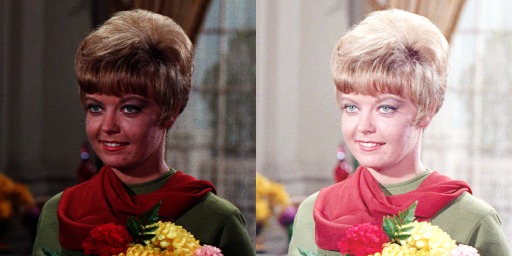

In [78]:
print('Change image Brightness ratio with Log Transformation')
print('-----------------------------')
try:
  brightness = int(input('Input Brightness value: '))
except ValueError:
  print('Error, not a number')

log_transformation = np.zeros(original.shape, original.dtype)

# access image each-pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      log_transformation[y, x, c] = np.clip(brightness *  np.log(1 + original[y, x, c]), 0, 255)

# show image
final_frame = cv.hconcat((original, log_transformation))
cv2_imshow(final_frame)

### **4.Implement grayscale transformation using averaging, lightness,and luminance in Google Colaboratory using the formula contained in Theory Review section**

**Gray Scale Averaging**

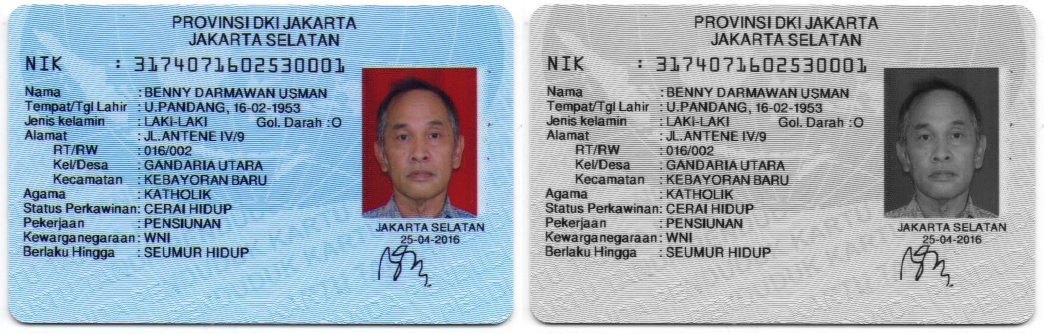

In [88]:
gray_avg_ktp = original_ktp.copy()

# access image each-pixel
for y in range(gray_avg_ktp.shape[0]):
  for x in range(gray_avg_ktp.shape[1]):
    red = gray_avg_ktp[y,x,2]
    green = gray_avg_ktp[y,x,1]
    blue = gray_avg_ktp[y,x,0]
    gray_avg_ktp[y,x] = np.mean([red, green, blue])

# show image
final_frame = cv.hconcat((original_ktp, gray_avg_ktp))
cv2_imshow(final_frame)

**Gray Scale Lightness**

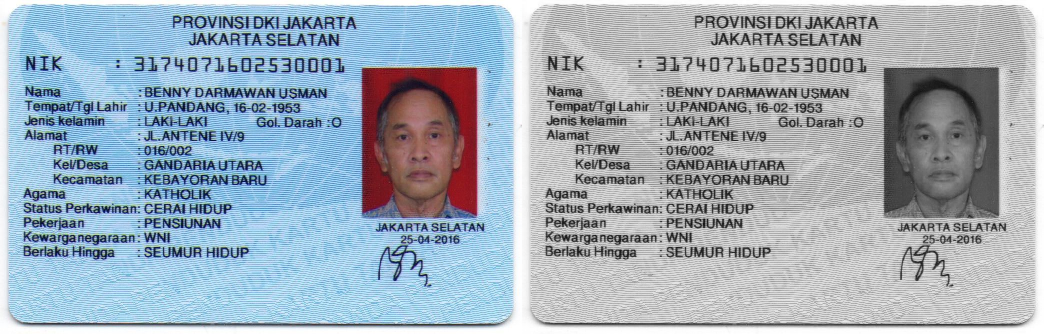

In [89]:
gray_lightness_ktp = original_ktp.copy()

# access image each-pixel
for y in range(gray_lightness_ktp.shape[0]):
  for x in range(gray_lightness_ktp.shape[1]):
    r_ktp = gray_lightness_ktp[y,x,2]
    g_ktp = gray_lightness_ktp[y,x,1]
    b_ktp = gray_lightness_ktp[y,x,0]

    # in max and min value try to use float 32 precision
    # and convert again to unsigned integer 8 precision
    # this do for non-break image
    max_ktp = np.float32(np.max([r_ktp, g_ktp, b_ktp]))
    min_ktp = np.float32(np.min([r_ktp, g_ktp, b_ktp]))
    gray_lightness_ktp[y,x] = np.uint8((max_ktp + min_ktp) / 2)

# show image
final_frame = cv.hconcat((original_ktp, gray_lightness_ktp))
cv2_imshow(final_frame)

**Gray Scale Luminance**

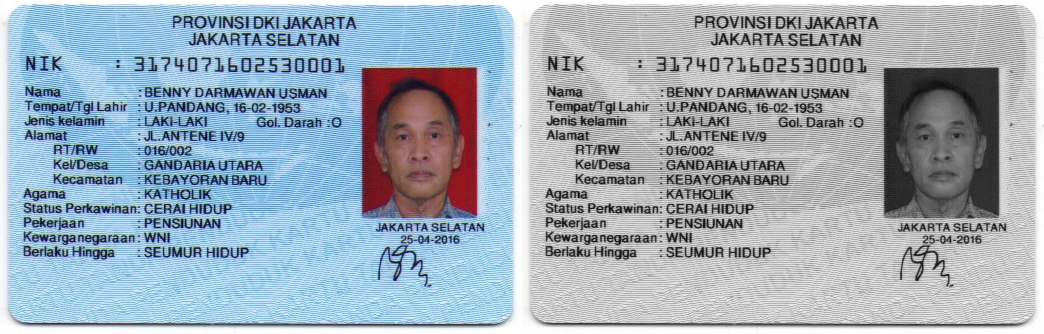

In [90]:
gray_luminance_ktp = original_ktp.copy()

# access image each-pixel
for y in range(gray_luminance_ktp.shape[0]):
  for x in range(gray_luminance_ktp.shape[1]):
    red = gray_luminance_ktp[y,x,2]
    green = gray_luminance_ktp[y,x,1]
    blue = gray_luminance_ktp[y,x,0]
    gray_luminance_ktp[y,x] = (0.21 * red) + (0.72 * green) + (0.07 * blue)

# show image
final_frame = cv.hconcat((original_ktp, gray_luminance_ktp))
cv2_imshow(final_frame)

### **5.Display certain colors in the image, and change other colors to grayscale**

**Solution-1: using bitwise masking**

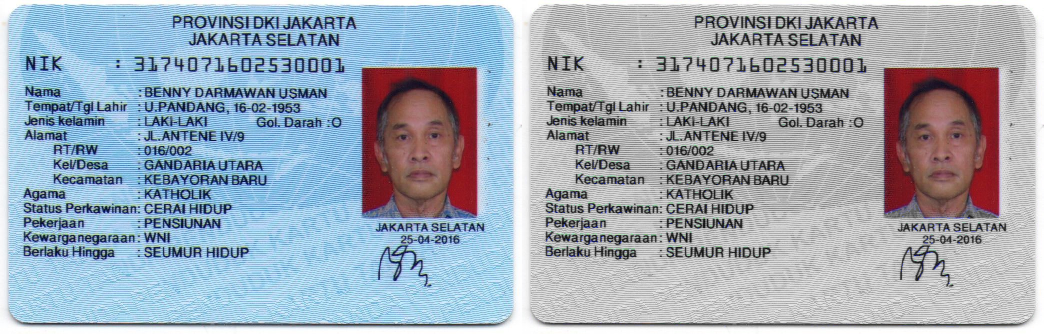

In [91]:
# Convert to HSV
hsv_image = cv.cvtColor(original_ktp, cv.COLOR_BGR2HSV)

# Define color range for masking the blue background
lower_bound = np.array([80, 0, 0])
upper_bound = np.array([115, 255, 255])

# Create mask and its inverse
mask = cv.inRange(hsv_image, lower_bound, upper_bound)
mask_inv = cv.bitwise_not(mask)

# Convert image to grayscale
gray_ktp = cv.cvtColor(original_ktp, cv.COLOR_BGR2GRAY)
gray_ktp_3ch = cv.cvtColor(gray_ktp, cv.COLOR_GRAY2BGR)

# Apply masks
color_region = cv.bitwise_and(original_ktp, original_ktp, mask=mask_inv)
gray_background = cv.bitwise_and(gray_ktp_3ch, gray_ktp_3ch, mask=mask)

# Combine color and gray image
final_image = cv.add(color_region, gray_background)

# Display the result
cv2_imshow(cv.hconcat((original_ktp, final_image)))

**Solution-2:using area masking**

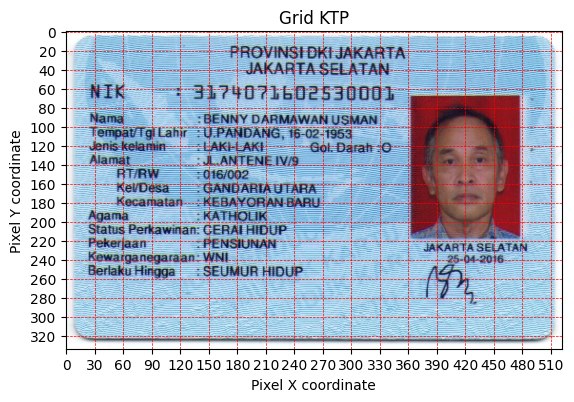

In [92]:
# griding ktp image for easy manipulate area coordinate
import matplotlib.pyplot as plt

plt.imshow(cv.cvtColor(original_ktp, cv.COLOR_BGR2RGB))

# title grid also label X and Y
plt.title('Grid KTP')
plt.xlabel('Pixel X coordinate')
plt.ylabel('Pixel Y coordinate')

# setup grid
plt.grid(True, which='both', color='r', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))

plt.show()

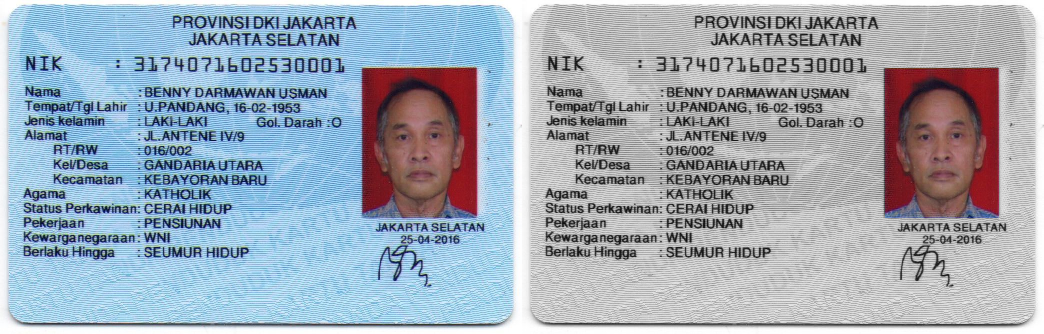

In [95]:
# define area for object that not convert to gray
# for the object (x_start, x_end, y_start, y_end)
# x_start and y_start is coordinate top left corner area object
# x_end and y_end is coordinate bottom right corner area object
x_start, y_start, x_end, y_end = 363, 68, 477, 218

# Convert the original image to grayscale
gray_ktp = cv.cvtColor(original_ktp, cv.COLOR_BGR2GRAY)

# Convert grayscale image back to 3-channel so we can combine it later
# this process we do to manipulate gray bgr with color object from original ktp
# if we do in gray_ktp will result errors
gray_ktp_3ch = cv.cvtColor(gray_ktp, cv.COLOR_GRAY2BGR)

# Copy the original image to keep the object in color
final_image = gray_ktp_3ch.copy()

# Replace the area of object in the grayscale image with the color object
final_image[y_start:y_end, x_start:x_end] = original_ktp[y_start:y_end, x_start:x_end]

cv2_imshow(cv.hconcat((original_ktp, final_image)))